# Introduction
**The selected dataset:** No-show appointments- Kaggle

**Purpose:** To perform a data analysis on the No-show appointments dataset.

**Dataset Description:** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The patients may or may not show up for their scheduled appointments due to some various reasons. I will be  investigating the dataset to see if any of the patients' detials, given as variables, have any effect to whether or not they show up to their appointments.
The dataset is made up of 14 variables which I would be giving a brief description of below.

**Description of each variable**
* 1.**PatientId:** It indicates the patient unique identification.
* 2.**AppointmentID:** The identification of each appointment.
* 3.**Gender:** It indicates the patient's gender, Male or Female.
* 4.**ScheduledDay:** It indicates the date or time the patient set up their appointment.
* 5.**AppointmentDay:** It indicates the date or time the patient should show up for their appointment.
* 6.**Age:** It indicates the patient's age.+
* 7.**Neighborhood:** It indicates the place where the appointments take place.
* 8.**Scholarship:** It indicates whether the patient is enrolled in Brasilian welfare program or not.https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000 
* 9.**Hipertension:** It indicates whether or not the patient is experiencing Hypertension.
* 10.**Diabetes:** It indicates whether the patient is experiencing Diabetes or not.
* 11.**Alcoholism:** It indicates whether or not the patient is experiencing Alcoholism.
* 12.**Handcap:** It indicates whether the patient has special needs or not.
* 13.**SMS_received:** It indicates whether the patient has received an Sms or not.
* 14.**No-show:** It shows whether the patient came for their appointment or not. ‘No’ is used if the patient showed up to their appointment, and ‘Yes’ is used if they did not show up.
I got the descriptions of the variables from the page:https://www.kaggle.com/datasets/joniarroba/noshowappointments 

# Questions for analysis
* 1.What is the ratio of patients who showed up to those who did not?
* 2.Does the gender, regardless of age group of patients, affect whether they show up or not?
* 3.Does the age-group affect response to appointments?
* 4.Does the patient being in the scholarship program affect response to appointments?
* 5.Does hypertension and diabetes, when compared with patients mean age, affect response to appointments?
* 6.Does alcoholism and handicap, when compared with patients mean age, affect response to appointments?
* 7.Does the neighbourhood affect response to appointments?
* 8.Does the sms received affect response to appointments?
* 9.Does the relationship between sms received and neighbourhood affect response to appointments?
* 10.Does the day of the week affect the response to treatment?
* 11. Does the waiting duration between the schedule date and appointment date affect response to treatment

I will be answering these questions by analysis the dataset.

In [417]:
# the import statements for all of the packages that may be needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data wrangling

# General properties

In [418]:
#Import the data from a CSV file 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset has been properly loaded and we can see that the first five rows (0-4) of the data set are displayed.

In [419]:
# To determine the datatypes of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The PatientId and AppointmentID columns are supposed to be imported as strings; instead, the columns are displayed as a numeric (integer or float) variable which doesn’t make sense. So, I will need to change them to a string type.
Also, ScheduledDay and AppointmentDay are in string format instead of datetime. So, I need to change them from the string format to a DateTime object. 

In [420]:
#To determine the number of patients (rows) and their characteristics (columns) contained in the dataset
df.shape

(110527, 14)

The data is made up of 110527 rows(which are the appointments) and 14 columns.


In [421]:
# Checking each of the columns individually for the number of unique values 
# Check for the number of unique patient ids in the columns
df['PatientId'].nunique()

62299

Only 62299 out of 110527 appointments are unique.

In [422]:

# Check the values in the Gender column

df['Gender'].nunique()

2

It shows that there are two types of gender: male and female.

In [423]:
# Check the values in ScheduledDay
df['ScheduledDay'].nunique()

103549

In [424]:
# Check the values in appointed day
df['AppointmentDay'].nunique()

27

In [425]:
# Check the values in neighbourhood
df['Neighbourhood'].nunique()

81

In [426]:
# To check for the number of unique values in the Neighbourhood column
df['Neighbourhood'].nunique()

81

In [427]:
# Check the values in the Age column
df['Age'].nunique()

104

In [428]:
# Check the values in the Scholarship column

df['Scholarship'].nunique()

2

In [429]:
# Check the values in the Hipertension column

df['Hipertension'].nunique()

2

In [430]:
# Check the values in the Alcoholism column

df['Alcoholism'].nunique()

2

In [431]:
# Check the values in the Diabetes column

df['Diabetes'].nunique()

2

In [432]:

# Check the values in the SMS_received column

df['SMS_received'].nunique()

2

In [433]:
# Check the values in the Handcap column

df['Handcap'].nunique()

5

In [434]:
# Check the values in the No-show column
df['No-show'].nunique()

2

**Summary:** In the section above, I explored each column individually to sort the unique elements in each of the columns and confirm the existence of any data errors, so that they can be fix them in the next step.

In [435]:
#  Providing a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The summary above shows that the data set does not have any missing values. But in order to be sure, I need to check for null values in the dataset.

In [436]:
# Check for any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the dataset.

In [437]:
# To see the basic  summary of statistics pertaining to the DataFrame columns.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I have obtained a descriptive statistics summary of the given dataframe showing the  mean, count, std deviation, percentiles, and mininimum anf maximum values of all the features.The mean of all ages is 37 years and the maximum age of a patient is 115 years. Looking at the the minumum age value, I notice that it has a negative value of -1 which does not make sense but this will be rectified later on by removing it from that data set. 



#  Data cleaning

I will take a 5 step approach to cleaning up the data

1. Identifying and removing any duplicate entries
2. Renaming the columns to make analysis easier
3. Removing the negative values from our data set
4. Deal with incorrect data type by converting it 
5. Creating new columns


# 1. Identifying and removing any duplicate entries

In [438]:
# Check for any duplicate rows
df.duplicated().sum()

0

This shows that there are no duplicated rows in the dataset.

# 2. Renaming the columns to make analysis easier

In [439]:
#We are renaming the columns "No-show", "Handcap" and "Hipertension"
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show' : 'No_show'}, inplace = True)

In [440]:
#To see if the columns have been changed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 3. Removing the negative values from our data set


In [441]:
#Previously, I encountered a number under the age column having a negative value.
# To identify the row containing the age with a negative value
df.loc[df.Age == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [442]:
# Dropping the row with age = -1
df = df.loc[df.Age != -1]

# Checking the values in the Age column to see if it has been drooped
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The negative value has been removed. I will accept patients with 0 age under the assumption that they represent children less than one year old.



# 4. Deal with incorrect data type by converting it 

In [443]:
# Deal with incorrect datatype convert patient_id and appointment_id to strings
df.PatientId = df.PatientId.astype(str)
df.AppointmentID = df.AppointmentID.astype(str)

In [444]:
# convert scheduled_day and appointment_day to datetime
df.ScheduledDay		 = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [445]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 5. Creating new columns

In [446]:
# Create a new column to show the Time span (in days) between the scheduling date and appointment date 
df['Time_span'] = df.AppointmentDay- df.ScheduledDay
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


In [447]:
# Excluding the records with the negative waiting duration

df = df[df['AppointmentDay'] >= df['ScheduledDay']]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49


In [448]:
df['Time_span'] = (df['Time_span']/np.timedelta64(1, 'D')).astype(int)


In [449]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1


In [450]:
#creating column for waiting duration groups
bins= [0, 7, 14, 21, 28, 35, 42]
labels = ['0-7','8-14','15-21','22-28','29-35', '36-42']
df['Waiting_duration'] = pd.cut(df['Time_span'], bins=bins, labels=labels, right=False)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span,Waiting_duration
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,0-7
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,0-7
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,0-7


In [451]:
#creating column for age groups
bins= [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20','21-40','41-60','61-80','81-100', '101-120']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span,Waiting_duration,Age_group
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,0-7,61-80
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7,21-40
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7,21-40
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,0-7,0-20
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,0-7,21-40


In [452]:
#creating a column to know which day of the week the patients have their appointment
df['Week_Day'] =  df.AppointmentDay.dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_span,Waiting_duration,Age_group,Week_Day
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,0-7,61-80,Friday
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7,21-40,Friday
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0-7,21-40,Friday
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,0-7,0-20,Friday
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,0-7,21-40,Friday


# Data wrangling summary¶
After gathering my data from the CSV file, I explored the columns to see their general properties and checked to see if there was any missing data. Then, I checked to see if there were duplicated entries. After this, I computed a summary of the statistics of the DataFrame columns. Finally, i cleaned the data by correcting the column names and dropping unnecessary information. I also created new columns that will help me in my analysis.

# Exploratory data analysis

# General look

Text(0, 0.5, 'Number of patients')

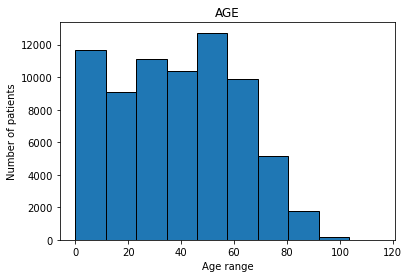

In [453]:
#Exploring the various data sets with histograms
#Exploring age
Age = df.Age.hist(figsize= (6,4), grid=False, edgecolor="black").set_title('AGE')
plt.xlabel('Age range')
plt.ylabel('Number of patients')


A histogram showing the various number of patients that fall within the minimum and maximum age ranges (0-115 years). Majority of the patients are between 0-10 years.

Text(0, 0.5, 'Number of patients')

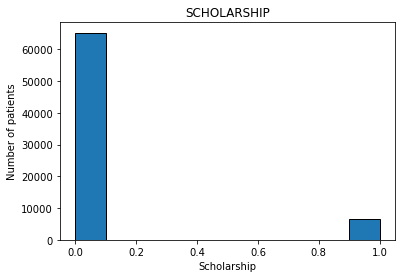

In [454]:
#Exploring scholarships
Scholarship = df.Scholarship.hist(figsize= (6,4), grid=False, edgecolor="black").set_title('SCHOLARSHIP')
plt.xlabel('Scholarship')
plt.ylabel('Number of patients')

This data showed that about 90,000 persons are not in the scholarship program while about 10,000 are.

Text(0, 0.5, 'Number of patients')

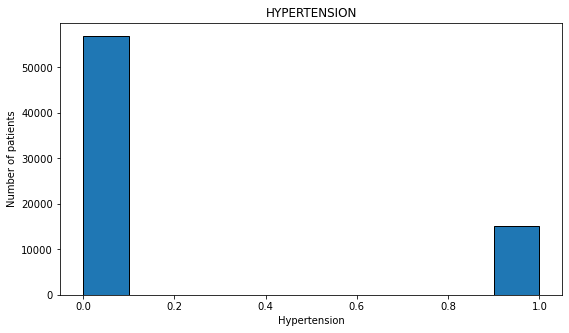

In [455]:
#Exploring hypertension
Hypertension = df.Hypertension.hist(figsize= (9,5), grid=False, edgecolor="black").set_title('HYPERTENSION')
plt.xlabel('Hypertension')
plt.ylabel('Number of patients')

This data showed that the number of those without hypertension (about 80,000+) is higher than those with hypertension (20,000)

Text(0, 0.5, 'Number of patients')

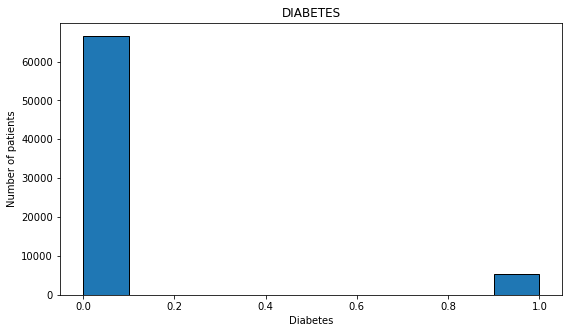

In [456]:
#Exploring diabetes
Diabetes = df.Diabetes.hist(figsize= (9,5), grid=False, edgecolor="black").set_title('DIABETES')
plt.xlabel('Diabetes')
plt.ylabel('Number of patients')

This data showed that the number of those without diabetes (about 100,000+) is higher than those with diabetes (less than 20,000)

Text(0, 0.5, 'Number of patients')

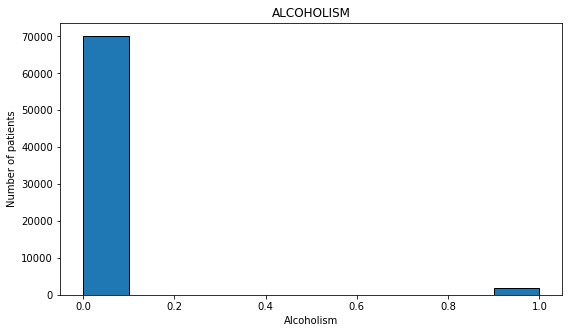

In [457]:
#Exploring alcoholism
Alcoholism = df.Alcoholism.hist(figsize= (9,5), grid=False, edgecolor="black").set_title('ALCOHOLISM')
plt.xlabel('Alcoholism')
plt.ylabel('Number of patients')

This data showed that the number of those without alcoholism (about 100,000+) is higher than those with alcoholism (less than 20,000)

Text(0, 0.5, 'Number of patients')

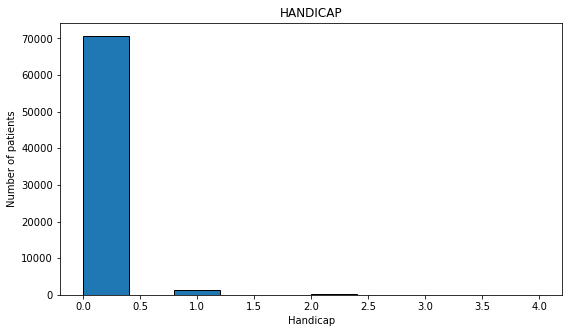

In [458]:
#Exploring handicap
Handicap = df.Handicap.hist(figsize= (9,5), grid=False, edgecolor="black").set_title('HANDICAP')
plt.xlabel('Handicap')
plt.ylabel('Number of patients')

This data showed that majority of the patients are not handicapped.

Text(0, 0.5, 'Number of patients')

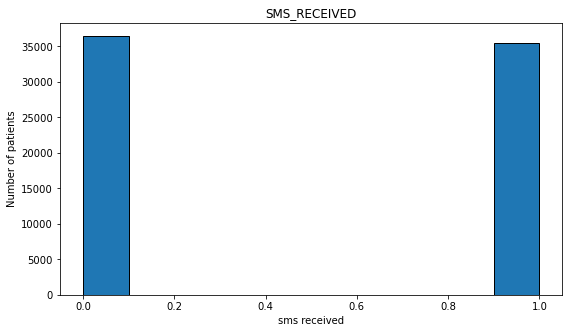

In [459]:
#Exploring sms received
SMS_received = df.SMS_received.hist(figsize= (9,5), grid=False, edgecolor="black").set_title('SMS_RECEIVED')
plt.xlabel('sms received')
plt.ylabel('Number of patients')

This data showed that the number of those who didn't receive sms (about 70,000+) is higher than those who did (30,000+)

# 1.What is the ratio of patients who showed up to those who did not?

In [460]:
#We are going to seperate the patients based on whether they showed up or not
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'
df[show].count(), df[noshow].count()


(PatientId           51437
 AppointmentID       51437
 Gender              51437
 ScheduledDay        51437
 AppointmentDay      51437
 Age                 51437
 Neighbourhood       51437
 Scholarship         51437
 Hypertension        51437
 Diabetes            51437
 Alcoholism          51437
 Handicap            51437
 SMS_received        51437
 No_show             51437
 Time_span           51437
 Waiting_duration    48373
 Age_group           51437
 Week_Day            51437
 dtype: int64,
 PatientId           20522
 AppointmentID       20522
 Gender              20522
 ScheduledDay        20522
 AppointmentDay      20522
 Age                 20522
 Neighbourhood       20522
 Scholarship         20522
 Hypertension        20522
 Diabetes            20522
 Alcoholism          20522
 Handicap            20522
 SMS_received        20522
 No_show             20522
 Time_span           20522
 Waiting_duration    19165
 Age_group           20522
 Week_Day            20522
 dtype: int64

The number of patients who showed up (88,207) is greater than the number of those that didn't (22,319).

# 2.Does the gender, regardless of age-group of patients, affect whether they show up or not?

In [461]:
Gender = print(df.Gender.value_counts())


F    48070
M    23889
Name: Gender, dtype: int64


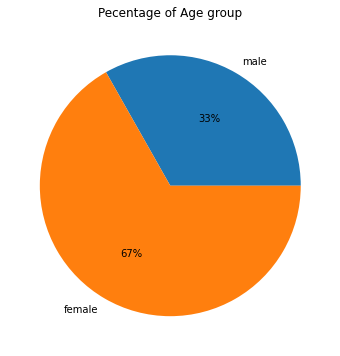

In [462]:
#pie chart showing the gender (%) of patient per appointment

data = [23889, 48070]
labels = ['male', 'female']
title = 'Pecentage of Age group'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

There are more females than males having appointments.

<AxesSubplot:xlabel='Gender', ylabel='count'>

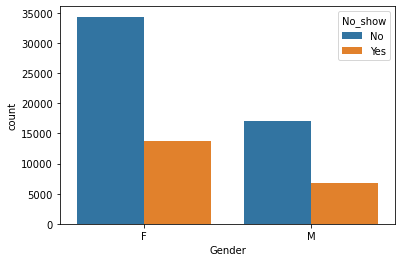

In [463]:
#Classifying whether patients showed up or not based on gender
sns.countplot(data = df, x = 'Gender', hue = 'No_show')

In [464]:
#Classifying whether patients showed up or not based on gender
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    34396
M    17041
Name: Gender, dtype: int64
F    13674
M     6848
Name: Gender, dtype: int64


Looking at the data above, I can infer that the proportion of appointments where female patients showed up is greater than the number of appointments where male patients showed up. According to the graph above, women are more concious about their health regardless of the age group.


# 3.Does the age-group affect response to appointments?

In [465]:
Age_group = print(df.Age_group.value_counts())

41-60      20324
21-40      18789
0-20       17995
61-80      12568
81-100      2274
101-120        9
Name: Age_group, dtype: int64


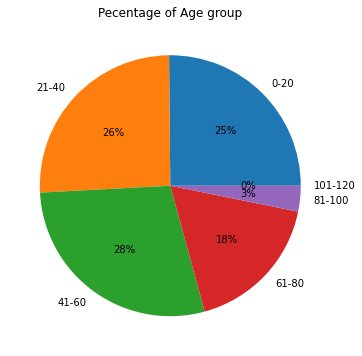

In [466]:
#pie chart showing the age group (%) of patient per appointment

data = [17995, 18389, 20324, 12568, 2274, 9]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120']
title = 'Pecentage of Age group'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

Looking at the above data, the 41-60 age group makes up the highest percentage of patints by appointments while the 101-120 age group makes up the least

<AxesSubplot:xlabel='Age_group', ylabel='count'>

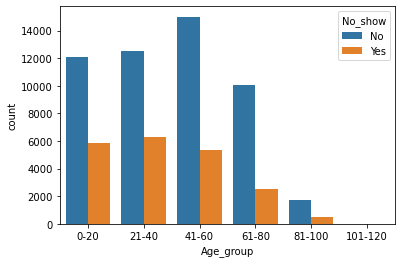

In [467]:
#Compare those who showed to those who didn't according to their age group
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'Age_group', hue = 'No_show')

In [468]:
print(df.Age_group[show].value_counts())
print(df.Age_group[noshow].value_counts())

41-60      14999
21-40      12526
0-20       12109
61-80      10041
81-100      1756
101-120        6
Name: Age_group, dtype: int64
21-40      6263
0-20       5886
41-60      5325
61-80      2527
81-100      518
101-120       3
Name: Age_group, dtype: int64


Those in 41-60 age group showed up more than all other age groups, with a population of 14,999 patients. The data also shows that the older they get, the less likely they are to show up for their appointment with only 6 patients showing up for their appointments in the 101-120 age group.

# 4.Does the patient being in the scholarship program affect response to appointments?

In [469]:
Scholarship = print(df.Scholarship.value_counts())


0    65288
1     6671
Name: Scholarship, dtype: int64


This data show that 99,665 have no scholarship but 10,861 do.

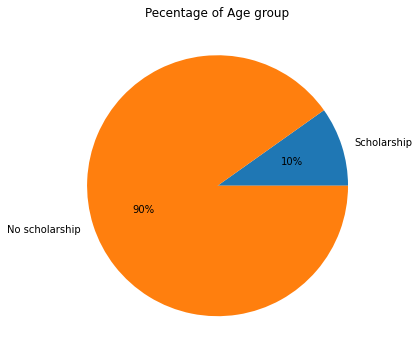

In [470]:
#pie chart showing the scholarship (%) of patient per appointment

data = [10861, 99665]
labels = ['Scholarship', 'No scholarship']
title = 'Pecentage of Age group'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

Looking at the chart above, I see that 90% of the patients don't have a scholarship, where as only 10% of the patients have been granted a scholarship.

<AxesSubplot:xlabel='Scholarship', ylabel='count'>

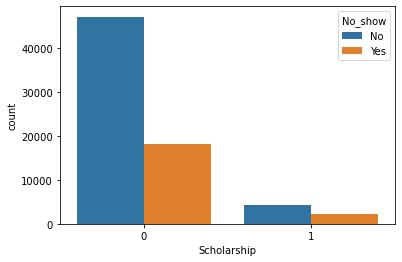

In [471]:
#classifying whether patients showed up or not based on scholarship
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'Scholarship', hue = 'No_show')

In [472]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    47099
1     4338
Name: Scholarship, dtype: int64
0    18189
1     2333
Name: Scholarship, dtype: int64


Looking at the chart above, it can be seen that the appointments that belongs to patients with no scholarship (47,099 of the total population) have the highest show-up rate, where as those with scholarships have a lower show-up rate (18,189 of the total population). So, scholarship did not encourage the number of people attending their appointments regardless of their age or gender.


# 5.Does hypertension and diabetes, when compared with patients mean age, affect response to appointments?

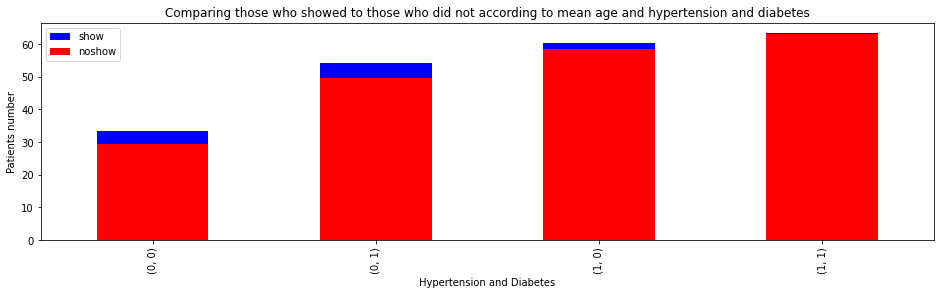

In [473]:
#Compare those who showed to those who have hypertension and diabetes by their mean age
plt.figure(figsize=(16, 4))
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind = 'bar', color='blue', label='show')
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind = 'bar', color='red', label='noshow')

plt.legend();
plt.title('Comparing those who showed to those who did not according to mean age and hypertension and diabetes')
plt.ylabel('Patients number');
plt.xlabel('Hypertension and Diabetes')
plt.show()

In [474]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'], df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           33.505135
               1           54.271307
 1             0           60.213595
               1           63.411588
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           29.291622
               1           49.666667
 1             0           58.474089
               1           63.121951
 Name: Age, dtype: float64)

The mean age of showing people not having hypertension and diabetes is 33 and of those who did not show up is 29. Hypertensive-diabetic showing and non-showing patients is around 63. This data analysis shows us that there is a correlation between age and hypertension and diabetes but having diabetes and hypertension does not influence the attendance rate.

# 5.Does alcoholism and handicap, when compared with patients mean age, affect response to appointments?

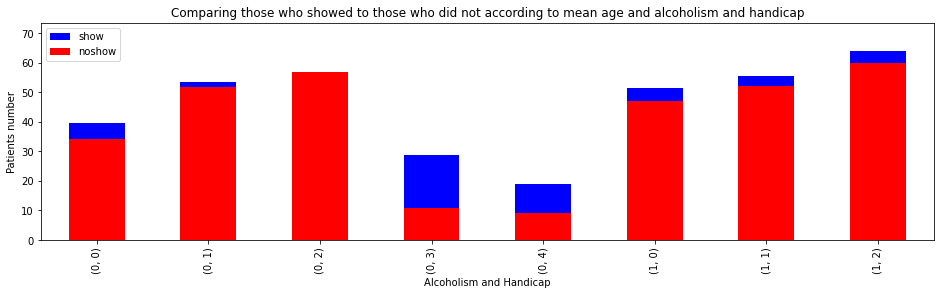

In [475]:
#Compare those who showed to those who have alcoholism and handicap by their mean age
plt.figure(figsize=(16, 4))
df[show].groupby(['Alcoholism', 'Handicap']).mean()['Age'].plot(kind = 'bar', color='blue', label='show')
df[noshow].groupby(['Alcoholism', 'Handicap']).mean()['Age'].plot(kind = 'bar', color='red', label='noshow')

plt.legend();
plt.title('Comparing those who showed to those who did not according to mean age and alcoholism and handicap')
plt.ylabel('Patients number');
plt.xlabel('Alcoholism and Handicap')
plt.show()

In [476]:
df[show].groupby(['Alcoholism', 'Handicap']).mean()['Age'], df[noshow].groupby(['Alcoholism', 'Handicap']).mean()['Age']

(Alcoholism  Handicap
 0           0           39.443696
             1           53.563380
             2           45.236842
             3           28.666667
             4           19.000000
 1           0           51.265517
             1           55.527778
             2           64.000000
             3           70.000000
 Name: Age, dtype: float64,
 Alcoholism  Handicap
 0           0           34.167143
             1           51.772414
             2           56.843750
             3           11.000000
             4            9.000000
 1           0           46.872549
             1           52.000000
             2           60.000000
 Name: Age, dtype: float64)

The mean age of showing people not having alcoholism and disability is 39 and of those who did not show up is 34. Alcoholic-handicap showing patient is 55 and non-showing patients is around 52. This data analysis shows us that there is a correlation between age and hypertension and disabilities but having disabilites and alcoholism does not influence the attendance rate.

# 7.Does the neighbourhood affect response to appointments?

In [477]:
Neighbourhood = print(df.Neighbourhood.value_counts())

JARDIM CAMBURI                 5213
MARIA ORTIZ                    3730
RESISTÊNCIA                    2818
JARDIM DA PENHA                2655
ITARARÉ                        2381
                               ... 
PONTAL DE CAMBURI                41
ILHA DO BOI                      23
ILHA DO FRADE                     8
AEROPORTO                         5
ILHAS OCEÂNICAS DE TRINDADE       2
Name: Neighbourhood, Length: 80, dtype: int64


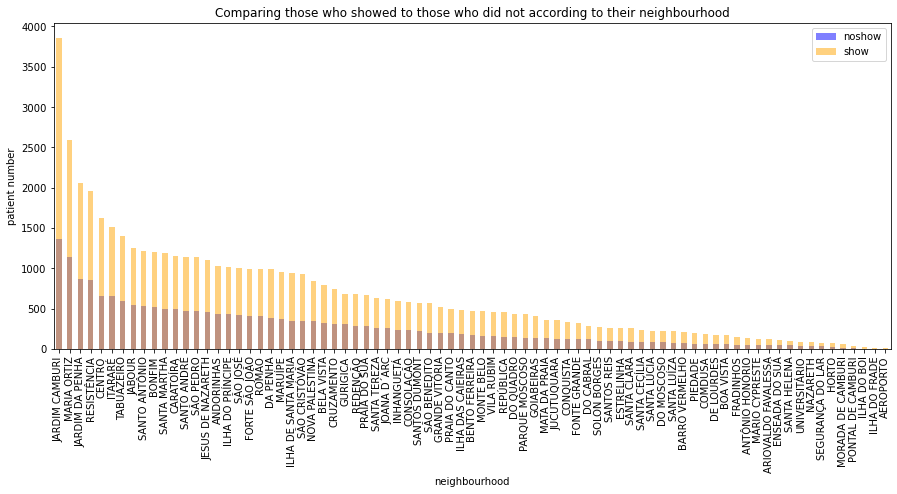

In [478]:
#classifying whether patients showed up or not based on neighbourhood
plt.figure(figsize=(15, 6))
df.Neighbourhood[noshow].value_counts().plot (kind = 'bar', alpha = 0.5, color='blue', label='noshow')
df.Neighbourhood[show].value_counts().plot (kind = 'bar', alpha = 0.5, color='orange', label='show')


plt.legend()
plt.title('Comparing those who showed to those who did not according to their neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('patient number');

Based on the analysis above, I found that the proportion of appointments where patients are based Jardim Camburi is the largest among other neighbourhoods and it also has the greatest showing rate compared to others. Neighbourhood has a great effect on attendance. 


# 8.Does the sms received affect response to appointments?

In [479]:
SMS_received = print(df.SMS_received.value_counts())

0    36477
1    35482
Name: SMS_received, dtype: int64


only 35482 received sms

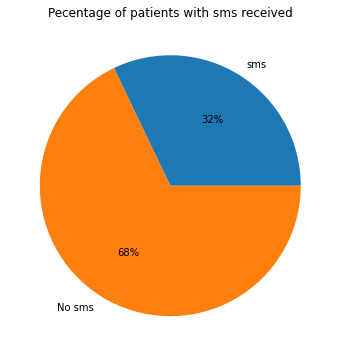

In [480]:
#pie chart showing the sms (%) per appointment

data = [35482, 75044]
labels = ['sms', 'No sms']
title = 'Pecentage of patients with sms received'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

Looking at the chart above, the appointment proportion where patients didn't receive an SMS is 68%, where the proportion of appointments where patients received an SMS is 32%

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

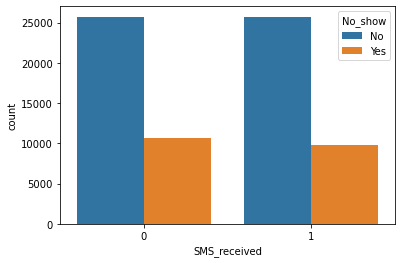

In [481]:
#classifying whether patients showed up or not based on sms received
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'SMS_received', hue = 'No_show')

Based on the initial analysis above, I discovered that the show-up rate of patients who didn't receive an SMS reminder is the highest, where as the show-up rate of patients who received an SMS reminder is lower. It seems like the sms campaign needs to be re-examined.

# 9 Does the reltionship between sms received and neighbourhood affect response to appointments?

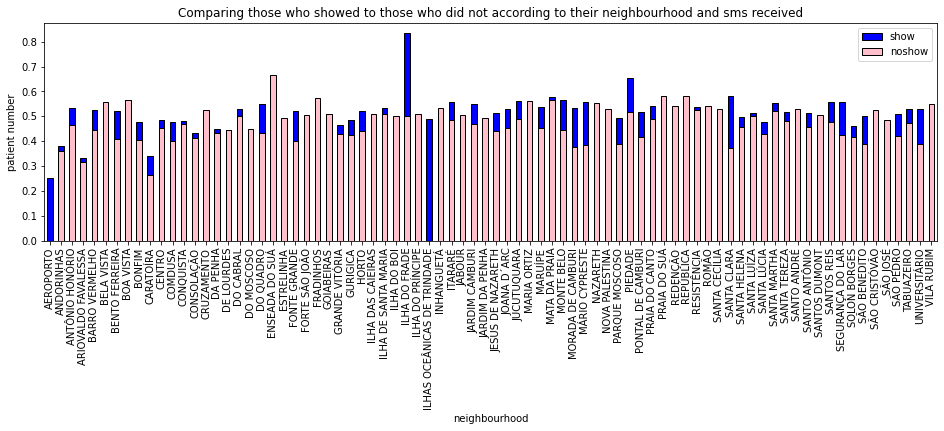

In [482]:
#compare those who showed to those who didn't according to their neighbourhood and receiving sms
plt.figure(figsize=(16, 4))
df[show].groupby(['Neighbourhood']).mean()['SMS_received'].plot(kind='bar', color='blue', grid=False, edgecolor="black", label='show')
df[noshow].groupby(['Neighbourhood']).mean()['SMS_received'].plot(kind='bar', color='pink', grid=False, edgecolor="black", label='noshow')


plt.legend();
plt.title('Comparing those who showed to those who did not according to their neighbourhood and sms received')
plt.xlabel('neighbourhood')
plt.ylabel('patient number');

Based on the initial analysis above, I discovered that sms campaign has postive results from five neighbourhoods (Aeroporto, Ilha Do Frade, Ilhas Oceanicas de Trinidade, Monte Belo and Mario cypreste), with Ilha Do Frade, having the most positive response.

# 10.Does the day of the week affect the response to treatment?

In [483]:
Week_Day = print(df.Week_Day.value_counts())

Wednesday    17044
Tuesday      16462
Monday       14581
Friday       12516
Thursday     11325
Saturday        31
Name: Week_Day, dtype: int64


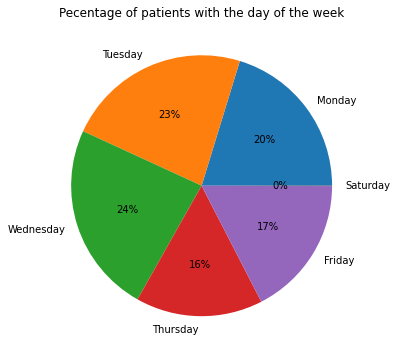

In [484]:
#pie chart showing the week day (%) per appointment

data = [14581, 16462, 17044, 11325, 12516, 31]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
title = 'Pecentage of patients with the day of the week'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

Looking at the data above, the highest amount of appointments is on a Wednesday, while the lowest is on a Saturday.

<AxesSubplot:xlabel='Week_Day', ylabel='count'>

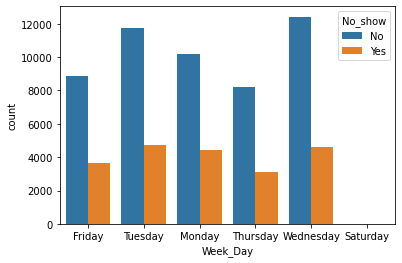

In [485]:
#classifying whether patients showed up or not based on week day
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'Week_Day', hue = 'No_show')

In [486]:
print(df.Week_Day[show].value_counts())
print(df.Week_Day[noshow].value_counts())

Wednesday    12417
Tuesday      11743
Monday       10176
Friday        8842
Thursday      8237
Saturday        22
Name: Week_Day, dtype: int64
Tuesday      4719
Wednesday    4627
Monday       4405
Friday       3674
Thursday     3088
Saturday        9
Name: Week_Day, dtype: int64


The show-up rate of patients who were scheduled to come on a Wednesday is the highest with 12,417 patients, while the show-up rate of patients who were scheduled to come on a Saturday is the lowest with 22 patients. The show up rates gradually decresed as it approached the weekend. So, the day of the week affects whether the patients shows up or not.

# 11. Does the waiting duration between the schedule date and appointment date affect response to treatment

In [487]:
Waiting_duration = print(df.Waiting_duration.value_counts())

0-7      32185
8-14     12025
15-21     8874
22-28     6704
29-35     5486
36-42     2264
Name: Waiting_duration, dtype: int64


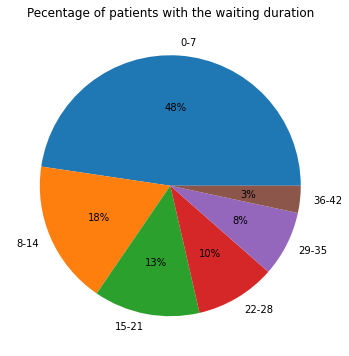

In [488]:
#pie chart showing the waiting duration (%) per appointment

data = [32185, 12025, 8874, 6704, 5486, 2264]
labels = ['0-7','8-14','15-21','22-28','29-35', '36-42']
title = 'Pecentage of patients with the waiting duration'
plt.figure(figsize= (6,6))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

From the analysis above, the smallest range of the waiting period (1-7)  has the most number of appointments while the appointments were lowest when the waiting period was between 36-42 days. 

<AxesSubplot:xlabel='Waiting_duration', ylabel='count'>

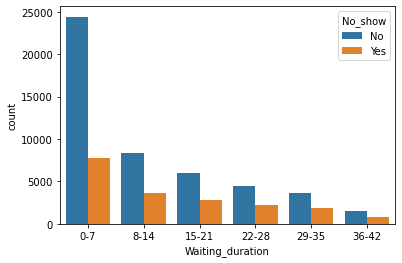

In [489]:
#classifying whether patients showed up or not based on Waiting duration
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'Waiting_duration', hue = 'No_show')

In [490]:
print(df.Waiting_duration[show].value_counts())
print(df.Waiting_duration[noshow].value_counts())

0-7      24413
8-14      8361
15-21     6013
22-28     4447
29-35     3666
36-42     1473
Name: Waiting_duration, dtype: int64
0-7      7772
8-14     3664
15-21    2861
22-28    2257
29-35    1820
36-42     791
Name: Waiting_duration, dtype: int64


The show-up rate of patients who had a waiting duration between 0-7 days is the highest with 24,413 in attendance, while the show-up rate of patients who have a waiting duration between 36-42 days is the lowest with 1463 showing up. So the waiting duration has a correlation with patients showing up or not

# Conclusion

* 1. Females showed up to their appointments more than males. So, they are more health conscious. Gender is an important factor in this data analysis.
* 2. The neighbourhood is strongly related to the number of patients showing up for their appointments.
* 3. The number of persons showing up from specific neighbourhoods are affected by their ages and receiving sms.
* 4. More people showed up without receiving sms. So, sms campaign might need to be discontinued.
* 5. Age is also important as those in the 41-60 age group were the most to show up.
* 6. The waiting period has an effect on attendance because the smaller the duration, the higher the showing up rates.
* 7. The data for weekday clearly shows that less people showed up to appointments at the end of the week than at the beggining. A simple strategy to reduce no-shows might be to preferentially load appointments, where practicable, towards the beggining of the week.
* 8. There is a relationship between the patients age and having illness like hypertension, diabetes, alcoholism and disabilities

# Problems

* 1. Other variables, such as the distance of the patient's place of residence to where the appointment was conducted was not included in the dataset and this could helped the analysis to be better. It would have been useful in analysing the data from the distance a patient have to travel in order to show up for their appointments.
* 2. There was no relationship between patients response to appointments and variables such as hypertension, diabetes, alcoholism, disabilities and scholarships.
* 3. The age values and time span included negative values which created problem in analysing the dataset. As I was not able to obtain a sufficient explanation on why those values were present, I had to exclude the data entries from the original dataset.
